In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

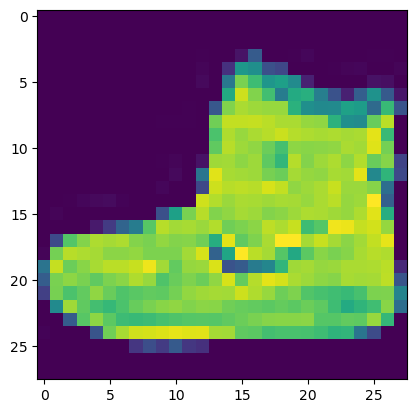

In [8]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [9]:
#normalizing
training_images  = training_images / 255.0
test_images = test_images / 255.0

## design a Model

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## compile and train the Model

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7824 - loss: 0.6305
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8628 - loss: 0.3818
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3409
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3096
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.2922


## Test the Model

In [12]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8629 - loss: 0.3860


[0.3818431496620178, 0.8639000058174133]

## Exploration Exercise
### exercise 1


In [13]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[6.6170064e-06 8.6195350e-08 1.2119476e-06 4.7470664e-08 2.7294998e-06
 1.5436199e-01 1.4523366e-05 1.3726982e-01 1.7168710e-05 7.0832592e-01]


In [14]:
print(classifications[1])

[1.1930840e-05 6.3773379e-13 9.9984062e-01 1.5606143e-10 8.3809289e-05
 9.9121496e-11 6.3596417e-05 3.2546777e-14 1.2637852e-10 3.3788839e-15]


In [18]:
print(test_labels[0])

9


It creates a set of classifications for each of the test images, then prints the first entry in the classifications. The output after you run it is a list of numbers. Why do you think that is and what do those numbers represent?

Try running print(test_labels[0]) and you'll get a 9. Does that help you understand why the list looks the way it does?

The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. For example, the first value in the list is the probability that the clothing is of class 0 and the next is a 1. Notice that they are all very low probabilities except one. Also, because of Softmax, all the probabilities in the list sum to 1.0.

The list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the neural network has predicted that the item it is classifying is most likely an ankle boot.

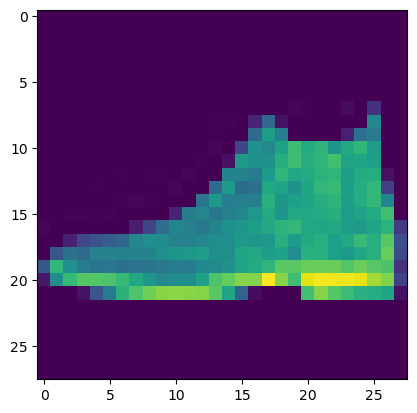

In [20]:
plt.imshow(test_images[0])

In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.5818
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.3630
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.3188
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.2952
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.2765
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3394
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[8.6376994e-09 1.6895808e-11 1.6265635e-10 6.5865713e-10 8.2903247e-11
 1.2655374e-04 3.2866545e-08 6.9592721e-03 3.1783836e-09 9.9291420e-01]
9


### Exercise 2
Look at the layers in your model. Experiment with different values for the dense layer with 512 neurons.

What different results do you get for loss and training time? Why do you think that's the case?

For example, if you increase to 1,024 neurons, you have to do more calculations, slowing down the process. But in this case they have a good impact because the model is more accurate. That doesn't mean more is always better. You can hit the law of diminishing returns very quickly.

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1500, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.5778
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.3624
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.3292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.2959
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.2753
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3354
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.07672635e-08 5.61082458e-10 1.84210016e-08 8.09604717e-10
 3.85628374e-09 6.75150892e-04 1.03287576e-07 3.62281278e-02
 2.17558949e-08 9.63096619e-01]
9


### Exercise 3
What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. The details of the error may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now your data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to flatten that 28,28 into a 784x1.

Instead of writing all the code, add the Flatten() layer at the beginning. When the arrays are loaded into the model later, they'll automatically be flattened for you

In [24]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

### Exercise 4
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?

Try training the network with 5. You get an error as soon as it finds an unexpected value. Another rule of thumb—the number of neurons in the last layer should match the number of classes you are classifying for. In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer

In [25]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\ASUS\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\ASUS\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\ASUS\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_8496\227251169.py", line 24, in <module>

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 357, in _compute_loss

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 325, in compute_loss

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 1853, in sparse_categorical_crossentropy

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 7 3 9 0 6 1 3 2 0 0 1 8 0 0 4 8 4 8 6 9 8 4 9 7 5 7 3 7 4 8 9 4
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_91705]

### Exercise 5
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10?

There isn't a significant impact because this is relatively simple data. For far more complex data, extra layers are often necessary

### Exercise 6
Before you trained, you normalized the data, going from values that were 0 through 255 to values that were 0 through 1. What would be the impact of removing that? Here's the complete code to give it a try (note that the two lines that normalize the data are commented out)

In [32]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 14.2560
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5686
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.5066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4901
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4806
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5366
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.2109653e-15 9.2393768e-13 1.0191996e-18 1.0801251e-11 5.3401626e-18
 3.7408426e-02 1.0583370e-11 1.1105293e-01 3.1883044e-08 8.5153860e-01]
9


## # Exercise 6-2: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [27]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.17.0
Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6348
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3838
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3393
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3171
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3016
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2746
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2676
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2539
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2471
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2320
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2333
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2315
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2145
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2052
Epoch 15/30
1875/1875 

# Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [28]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5908
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3657
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3332
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2966
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2827
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3494
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[5.4443252e-08 3.5201257e-08 7.8609368e-09 6.5432006e-09 6.5532797e-09
 1.1406296e-03 2.2117776e-07 2.9105654e-02 8.7529736e-07 9.6975255e-01]
9


### 8. Explore callbacks
Earlier, when you trained for extra epochs, you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that and you might have thought that it'd be nice if you could stop the training when you reach a desired value, such as 95% accuracy. If you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs?

Like any other program, you have callbacks! See them in action:

In [30]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7951 - loss: 0.5781
Epoch 2/5
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8651 - loss: 0.3633
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8651 - loss: 0.3633


#### References:
https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb#scrollTo=kRH19pWs6ZDn

https://developers.google.com/codelabs/tensorflow-2-computervision#7

In [ ]:
#